# RenAIssance OCR Model Testing Notebook
## This notebook integrates CRAFT, PSENet and DBNet for comparative text detection.


#### Setup & Requirements


In [1]:
%pip install -q gdown opencv-python matplotlib scikit-image pytorch-lightning


Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.13.1+cpu requires torch==1.13.1, but you have torch 2.7.1 which is incompatible.
torchvision 0.14.1+cpu requires torch==1.13.1, but you have torch 2.7.1 which is incompatible.


#### Clone PSENet and DBNet Repos

In [2]:
!git clone https://github.com/whai362/PSENet.git
!git clone https://github.com/MhLiao/DB.git
!git clone https://github.com/kaoreill/CRAFTModel.git



fatal: destination path 'PSENet' already exists and is not an empty directory.
fatal: destination path 'DB' already exists and is not an empty directory.
fatal: destination path 'CRAFTModel' already exists and is not an empty directory.


#### Download pretrained weights

DBNet Pretrained Weights:

In [3]:
import os
import urllib.request

# Destination directory
checkpoint_dir = os.path.join("db", "weights")
os.makedirs(checkpoint_dir, exist_ok=True)

# List of model URLs
urls = [
    "https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50_fpnc_1200e_icdar2015/dbnetpp_resnet50_fpnc_1200e_icdar2015_20221025_185550-013730aa.pth",
    "https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-dcnv2_fpnc_1200e_icdar2015/dbnetpp_resnet50-dcnv2_fpnc_1200e_icdar2015_20220829_230108-f289bd20.pth",
    "https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth"
]

# Download each model
for url in urls:
    filename = os.path.join(checkpoint_dir, os.path.basename(url))
    print(f"Downloading to: {filename}")
    urllib.request.urlretrieve(url, filename)
    print(f"Downloaded: {os.path.basename(url)}")

print("\nAll DBNet++ weights downloaded successfully.")


Downloaded: dbnetpp_resnet50_fpnc_1200e_icdar2015_20221025_185550-013730aa.pth
Downloaded: dbnetpp_resnet50-dcnv2_fpnc_1200e_icdar2015_20220829_230108-f289bd20.pth
Downloaded: dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth

All DBNet++ weights downloaded successfully.


PSENet Pretrained Weights:

In [4]:
import os
import urllib.request

# Target directory for PSENet weights
checkpoint_dir = os.path.join("PSENet", "weights")
os.makedirs(checkpoint_dir, exist_ok=True)

# List of download URLs for PSENet models
urls = [
    "https://download.openmmlab.com/mmocr/textdet/psenet/psenet_resnet50_fpnf_600e_ctw1500/psenet_resnet50_fpnf_600e_ctw1500_20220825_221459-7f974ac8.pth",
    "https://download.openmmlab.com/mmocr/textdet/psenet/psenet_resnet50-oclip_fpnf_600e_ctw1500/psenet_resnet50-oclip_fpnf_600e_ctw1500_20221101_140406-d431710d.pth",
    "https://download.openmmlab.com/mmocr/textdet/psenet/psenet_resnet50_fpnf_600e_icdar2015/psenet_resnet50_fpnf_600e_icdar2015_20220825_222709-b6741ec3.pth",
    "https://download.openmmlab.com/mmocr/textdet/psenet/psenet_resnet50-oclip_fpnf_600e_icdar2015/psenet_resnet50-oclip_fpnf_600e_icdar2015_20221101_131357-2bdca389.pth"
]

# Download loop
for url in urls:
    filename = os.path.join(checkpoint_dir, os.path.basename(url))
    print(f"Downloading to: {filename}")
    urllib.request.urlretrieve(url, filename)
    print(f"✔ Downloaded: {os.path.basename(url)}")

print("\n All PSENet weights downloaded successfully")


✔ Downloaded: psenet_resnet50_fpnf_600e_ctw1500_20220825_221459-7f974ac8.pth
✔ Downloaded: psenet_resnet50-oclip_fpnf_600e_ctw1500_20221101_140406-d431710d.pth
✔ Downloaded: psenet_resnet50_fpnf_600e_icdar2015_20220825_222709-b6741ec3.pth
✔ Downloaded: psenet_resnet50-oclip_fpnf_600e_icdar2015_20221101_131357-2bdca389.pth

 All PSENet weights downloaded successfully


CRAFT Pretrained Weights:

In [5]:
import os
import gdown

# Set the path to the weights folder inside CRAFT-pytorch
craft_dir = os.path.join("CRAFTModel", "weights")
os.makedirs(craft_dir, exist_ok=True)

# Dictionary of pretrained model URLs (GDrive file IDs)
urls = {
    "craft_mlt_25k.pth": "1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ",
    "craft_ic15_20k.pth": "1i2R7UIUqmkUtF0jv_3MXTqmQ_9wuAnLf",
    "craft_refiner_CTW1500.pth": "1XSaFwBkOaFOdtk4Ane3DFyJGPRw6v5bO"
}

# Download each file
for name, file_id in urls.items():
    output_path = os.path.join(craft_dir, name)
    url = f"https://drive.google.com/uc?id={file_id}"
    print(f"Downloading {name} to {output_path}...")
    gdown.download(url, output_path, quiet=False)
    print(f"✔ Downloaded {name}")

print("All CRAFT weights saved successfully.")


Downloading...
From: https://drive.google.com/uc?id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ
To: c:\Users\katej\OneDrive\Documents\GitHub\RenAIssance\RenAIssance_CRNN_OCR_Kate_OReilly\CRAFTModel\weights\craft_mlt_25k.pth
100%|██████████| 83.2M/83.2M [00:10<00:00, 8.20MB/s]


✔ Downloaded craft_mlt_25k.pth


Downloading...
From: https://drive.google.com/uc?id=1i2R7UIUqmkUtF0jv_3MXTqmQ_9wuAnLf
To: c:\Users\katej\OneDrive\Documents\GitHub\RenAIssance\RenAIssance_CRNN_OCR_Kate_OReilly\CRAFTModel\weights\craft_ic15_20k.pth
100%|██████████| 83.2M/83.2M [00:10<00:00, 8.11MB/s]


✔ Downloaded craft_ic15_20k.pth


Downloading...
From: https://drive.google.com/uc?id=1XSaFwBkOaFOdtk4Ane3DFyJGPRw6v5bO
To: c:\Users\katej\OneDrive\Documents\GitHub\RenAIssance\RenAIssance_CRNN_OCR_Kate_OReilly\CRAFTModel\weights\craft_refiner_CTW1500.pth
100%|██████████| 1.85M/1.85M [00:00<00:00, 7.05MB/s]


✔ Downloaded craft_refiner_CTW1500.pth
All CRAFT weights saved successfully.


#### Import Modules

In [4]:
import os
import cv2
import torch

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
# from jiwer import wer, cer
import editdistance

import os
import sys

project_root = os.path.abspath("CRAFT-pytorch")
if project_root not in sys.path:
    sys.path.append(project_root)

print("Resolved project root:", project_root)
print("Files in that directory:", os.listdir(project_root))


from pathlib import Path
from torchvision import transforms
import importlib.util

craft_path = os.path.abspath("CRAFT-pytorch/craft.py")
spec = importlib.util.spec_from_file_location("craft", craft_path)
craft_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(craft_module)

CRAFT = craft_module.CRAFT

from craft_utils import getDetBoxes
from imgproc import normalizeMeanVariance
from PIL import Image

Resolved project root: c:\Users\katej\OneDrive\Documents\GitHub\RenAIssance\RenAIssance_CRNN_OCR_Kate_OReilly\CRAFT-pytorch
Files in that directory: ['.git', '.gitignore', 'basenet', 'craft.py', 'craft_utils.py', 'figures', 'file_utils.py', 'imgproc.py', 'LICENSE', 'README.md', 'refinenet.py', 'requirements.txt', 'test.py', 'weights', '__pycache__']


#### Read Renaissance Images

In [7]:
image_folder = "./data/imgsForAllPages"
image_paths = sorted(glob(os.path.join(image_folder, '*.jpg')) + glob(os.path.join(image_folder, '*.png')))

#### Display first image

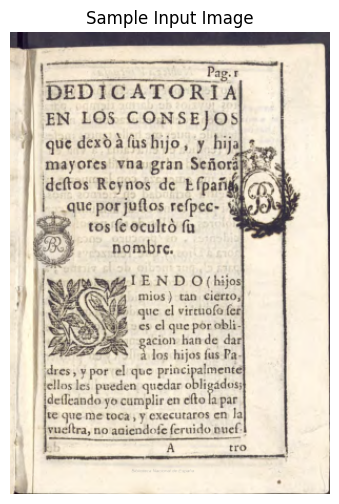

In [8]:
sample_image_path = image_paths[0]
img = cv2.imread(sample_image_path)
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample Input Image")
plt.axis("off")
plt.show()

#### Configuration

In [9]:
INPUT_FOLDER = 'data/imgsForAllPages'
CRAFT_MODEL_PATH = 'CRAFT-pytorch/weights/craft_mlt_25k.pth'
OUTPUT_OVERLAY = 'output/craft/overlays'
OUTPUT_BOXES = 'output/craft/boxes'

os.makedirs(OUTPUT_OVERLAY, exist_ok=True)
os.makedirs(OUTPUT_BOXES, exist_ok=True)

#### Utility Functions

In [10]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return np.array(image)

def save_overlay(image, boxes, save_path):
    for box in boxes:
        pts = np.array(box).reshape((-1, 1, 2)).astype(np.int32)
        cv2.polylines(image, [pts], True, (0, 255, 0), thickness=2)
    cv2.imwrite(save_path, image)

def save_boxes_txt(boxes, save_path):
    with open(save_path, 'w') as f:
        for box in boxes:
            flattened = [str(coord) for point in box for coord in point]
            f.write(','.join(flattened) + '\n')

#### Load CRAFT Model

In [12]:
# Path to your model
CRAFT_MODEL_PATH = 'CRAFT-pytorch/weights/craft_mlt_25k.pth'

# Initialize the model
craft_net = CRAFT()

# Load weights and remove 'module.' prefixes
state_dict = torch.load(CRAFT_MODEL_PATH, map_location='cpu')
new_state_dict = {}

for k, v in state_dict.items():
    new_key = k.replace('module.', '')  # strip 'module.' if present
    new_state_dict[new_key] = v

# Load the cleaned state_dict
craft_net.load_state_dict(new_state_dict)

# Set model to evaluation mode
craft_net.eval()

print("CRAFT model loaded successfully.")



CRAFT model loaded successfully.


#### Run Detection

In [13]:
import torch
import numpy as np
import cv2
from PIL import Image
from craft_utils import getDetBoxes
from imgproc import normalizeMeanVariance

def run_craft(image_np, debug=False):
    # Resize to match model input
    image_resized = cv2.resize(image_np, (1280, 1280))
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    
    # Normalize
    norm_image = normalizeMeanVariance(image_rgb)
    norm_image = norm_image.transpose(2, 0, 1)  # HWC → CHW
    norm_tensor = torch.from_numpy(norm_image).unsqueeze(0).float()

    # Inference
    with torch.no_grad():
        y, _ = craft_net(norm_tensor)

    # Get boxes
    score_text = y[0, :, :, 0].cpu().numpy()
    score_link = y[0, :, :, 1].cpu().numpy()
    boxes, _ = getDetBoxes(score_text, score_link, 0.8, 0.6, 0.5, False)

    if debug:
        print(f"Detected {len(boxes)} boxes.")
        if len(boxes) == 0:
            print(" No text regions found. Try lowering thresholds or preprocessing.")

    return boxes


#### Main Loop

In [14]:
image_paths = list(Path(INPUT_FOLDER).glob("*.jpg")) + list(Path(INPUT_FOLDER).glob("*.png"))

for img_path in image_paths:
    filename = img_path.stem
    image_np = load_image(str(img_path))
    boxes = run_craft(image_np)

    overlay_path = os.path.join(OUTPUT_OVERLAY, f"{filename}_overlay.jpg")
    txt_path = os.path.join(OUTPUT_BOXES, f"{filename}.txt")

    save_overlay(image_np.copy(), boxes, overlay_path)
    save_boxes_txt(boxes, txt_path)

print(f"Processed all files")


Processed all files


#### Viusal Representation of Bounding Boxes

In [15]:
import os
import cv2

def draw_bounding_boxes(image_path, boxes_path, output_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Could not read {image_path}")
        return

    with open(boxes_path, 'r') as f:
        lines = f.read().split(';')  

    for group in lines:
        for line in group.strip().splitlines():
            try:
                coords = list(map(float, line.strip().split(',')))
                if len(coords) == 8:
                    pts = [(int(coords[i]), int(coords[i+1])) for i in range(0, 8, 2)]
                    for j in range(4):
                        cv2.line(image, pts[j], pts[(j+1)%4], (0, 255, 0), 2)
            except ValueError:
                print(f"Skipping malformed line: {line}")
                continue

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    cv2.imwrite(output_path, image)



#### Visualizing Unsorted Bounding Boxes with Overlays


In [ ]:

INPUT_FOLDER = "data/imgsForAllPages"
OKAY = "data/craft/boxes"
OUTPUT_BOXES = "output/craft/boxes_sorted"        
OUTPUT_OVERLAY = "output/craft/overlays_sorted"

os.makedirs(OUTPUT_OVERLAY, exist_ok=True)
for file in os.listdir(OKAY):
    if file.endswith(".txt"):
        sort_bounding_boxes()

for file in os.listdir(OUTPUT_BOXES):
    if file.endswith(".txt"):
        base_name = os.path.splitext(file)[0]  # removes .txt
        image_name = base_name + ".png"
        image_path = os.path.join(INPUT_FOLDER, image_name)
        boxes_path = os.path.join(OUTPUT_BOXES, file)
        output_path = os.path.join(OUTPUT_OVERLAY, image_name)

        draw_bounding_boxes(image_path, boxes_path, output_path)



#### Sort Bounding Boxes

In [16]:
import os

def sort_bounding_boxes(input_dir, output_dir):
    """
    Sorts bounding boxes in .txt files (format: x1,y1,x2,y2,x3,y3,x4,y4) by top-to-bottom and left-to-right
    and writes the sorted results to a new folder.
    """
    for filename in os.listdir(input_dir):
        if filename.endswith(".txt"):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            with open(input_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()

            boxes = []
            for line in lines:
                coords = list(map(float, line.strip().split(',')))
                if len(coords) == 8:
                    # Average y to sort top-down
                    avg_y = (coords[1] + coords[3] + coords[5] + coords[7]) / 4.0
                    avg_x = (coords[0] + coords[2] + coords[4] + coords[6]) / 4.0
                    boxes.append((avg_y, avg_x, line))

            # Sort by y, then x
            boxes.sort()
            with open(output_path, 'w', encoding='utf-8') as f:
                for _, _, line in boxes:
                    f.write(line)


In [ ]:

INPUT_FOLDER = "data/imgsForAllPages"
OKAY = "output/craft/boxes"
OUTPUT_BOXES = "output/craft/boxes_sorted"        
OUTPUT_OVERLAY = "output/craft/overlays_sorted"

os.makedirs(OUTPUT_OVERLAY, exist_ok=True)
for file in os.listdir(OKAY):
    if file.endswith(".txt"):
        sort_bounding_boxes(OKAY, OUTPUT_BOXES)

for file in os.listdir(OUTPUT_BOXES):
    if file.endswith(".txt"):
        base_name = os.path.splitext(file)[0]  # removes .txt
        image_name = base_name + ".png"
        image_path = os.path.join(INPUT_FOLDER, image_name)
        boxes_path = os.path.join(OUTPUT_BOXES, file)
        output_path = os.path.join(OUTPUT_OVERLAY, image_name)

        draw_bounding_boxes(image_path, boxes_path, output_path)



: 

CRAFT Detection and Overlay and Sorting

In [18]:
import os
import subprocess
import sys
from glob import glob

python_exe = sys.executable  # Path to active Python interpreter

# Define paths
CRAFT_SCRIPT = "CRAFTModel/test.py"
IMG_FOLDER = "data/processed_data"
OUTPUT_BOXES = "output/craft/boxes"
WEIGHTS = "CRAFTModel/weights/craft_mlt_25k.pth"

# Step 1: Run CRAFT
os.makedirs(OUTPUT_BOXES, exist_ok=True)

try:
    subprocess.run([
        python_exe,
        CRAFT_SCRIPT,
        f"--trained_model={WEIGHTS}",
        f"--test_folder={IMG_FOLDER}"
    ], capture_output=True, text=True, check=True)
except subprocess.CalledProcessError as e:
    print("CRAFT script failed.")
    print("Exit Code:", e.returncode)
    print("Stderr:", getattr(e, "stderr", str(e)))
    raise  # Let the notebook show the error traceback

# Step 2: Sort bounding boxes
INPUT_DIR = OUTPUT_BOXES
OUTPUT_DIR = "output/craft/boxes_sorted"
os.makedirs(OUTPUT_DIR, exist_ok=True)
sort_bounding_boxes(INPUT_DIR, OUTPUT_DIR)

print("✅ CRAFT detection + sorting + overlay complete")


CRAFT script failed.
Exit Code: 2
Stderr: C:\Users\katej\AppData\Local\Programs\Python\Python39\python.exe: can't open file 'c:\Users\katej\OneDrive\Documents\GitHub\RenAIssance\RenAIssance_CRNN_OCR_Kate_OReilly\CRAFTModel\test.py': [Errno 2] No such file or directory



CalledProcessError: Command '['c:\\Users\\katej\\OneDrive\\Documents\\GitHub\\RenAIssance\\venv\\Scripts\\python.exe', 'CRAFTModel/test.py', '--trained_model=CRAFTModel/weights/craft_mlt_25k.pth', '--test_folder=data/processed_data']' returned non-zero exit status 2.